<h1> Implémentation d'un arbre binaire avec une classe </h1>


<p>On va utiliser la POO pour créer une classe AB (pour Arbre Binaire), en utilisant le caractère récursif d'un arbre: une racine, et éventuellement un sous-arbre gauche et un sous-arbre droit.</p>

In [ ]:
class AB:
    def __init__(self, racine=None):
        self.racine = racine
        if self.racine is not None:
            self.gauche = AB()  
            self.droit = AB()
    
    def est_vide(self):
        pass
    
    def afficher_fils_gauche(self):
        pass
    
    def afficher_fils_droit(self):
        pass
    
    def est_feuille(self):
        pass
    
    def hauteur(self):
        pass
    
    def taille(self):
        pass


<p> On peut alors créer l'arbre ci-dessous avec le code :</p>

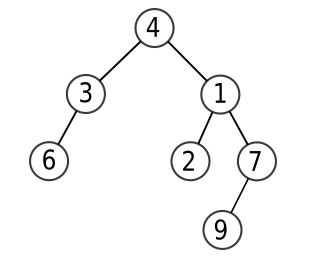

In [ ]:
a = AB(4)
a.gauche = AB(3)
a.droit = AB(1)
a.droit.gauche = AB(2)
a.droit.droit = AB(7)
a.gauche.gauche = AB(6)
a.droit.droit.gauche = AB(9)


**Exercice 1** :  Complèter la classe AB par les méthodes puis les tester : 
<div style="margin-left:50px">
<li> est_vide qui renvoie un boleen si l'arbre est vide </li>
<li> afficher_ils_gauche (et afficher_fils droit) qui renvoie la racine de l'arbre gauche (et droit )</li>
<li> est_feuille qui renvoie vrai si le noeud est une feuille ou faux sinon </li>
</div>

In [ ]:
# jeux de tests


**Exercice2** : Completer la classe avec la methode hauteur (on choisira -1 pour la hauteur un arbre vide)

In [ ]:
# tests


In [ ]:
# tests de l'arbre vide
b=AB()
b.est_vide()
b.hauteur()

<h4> Réprésentation d'un arbre </h4>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def repr_graph(arbre, size=(4,3), null_node=False):
    """
    size : tuple de 2 entiers. Si size est int -> (size, size)
    null_node : si True, trace les liaisons vers les sous-arbres vides
    """
    def parkour(arbre, noeuds, branches, labels, positions, profondeur, pos_courante, pos_parent, null_node):
        if not(arbre.est_vide()):
            noeuds[0].append(pos_courante)
            positions[pos_courante] = (pos_courante, profondeur)
            profondeur -= 1
            labels[pos_courante] = str(arbre.racine)
            branches[0].append((pos_courante, pos_parent))
            pos_gauche = pos_courante - 2**profondeur
            parkour(arbre.gauche,noeuds, branches, labels, positions, profondeur, pos_gauche, pos_courante, null_node)
            pos_droit = pos_courante + 2**profondeur
            parkour(arbre.droit, noeuds, branches, labels, positions, profondeur, pos_droit, pos_courante, null_node)
        elif null_node:
            noeuds[1].append(pos_courante)
            positions[pos_courante] = (pos_courante, profondeur)
            branches[1].append((pos_courante, pos_parent))
    
    
    if arbre ==None:
        return
    
    branches = [[]]
    profondeur = arbre.hauteur()
    pos_courante = 2**profondeur
    noeuds = [[pos_courante]]
    positions = {pos_courante: (pos_courante, profondeur)} 
    labels = {pos_courante: str(arbre.racine)}
    
    if null_node:
        branches.append([])
        noeuds.append([])
        
    profondeur -= 1
    parkour(arbre.gauche, noeuds, branches, labels, positions, profondeur, pos_courante - 2**profondeur, pos_courante, null_node)
    parkour(arbre.droit, noeuds, branches, labels, positions, profondeur, pos_courante + 2**profondeur, pos_courante, null_node) 

    mon_arbre = nx.Graph()
    
    if type(size) == int:
        size = (size, size)    
    plt.figure(figsize=size)
    
    nx.draw_networkx_nodes(mon_arbre, positions, nodelist=noeuds[0], node_color="white", node_size=550, edgecolors="blue")
    nx.draw_networkx_edges(mon_arbre, positions, edgelist=branches[0], edge_color="black", width=2)
    nx.draw_networkx_labels(mon_arbre, positions, labels)

    if null_node:
        nx.draw_networkx_nodes(mon_arbre, positions, nodelist=noeuds[1], node_color="white", node_size=50, edgecolors="grey")
        nx.draw_networkx_edges(mon_arbre, positions, edgelist=branches[1], edge_color="grey", width=1)

    ax = plt.gca()
    ax.margins(0.1)
    plt.axis("off")
    plt.show()
    plt.close()

In [ ]:
repr_graph(a,(4,3),False)

**Exercice 3** : Completer avec la methode taille

In [ ]:
# tests

**Exercice 4** : Completer avec la methode nombre de feuilles  :

In [ ]:
#tests

**Exercice 5** : Ecrire une fonction booléenne récursive qui recherche si une valeur v est présente dans un arbre A

In [ ]:
def recherche(arbre,v):
    pass

**Exercice 6**:  a) Ecrire une fonction ajout_gauche(arbre,x) qui ajoute un noeud x à gauche de l'arbre à l'endroit où si c'est possible <br>
b) idem pour une fonction ajout_droit(arbre,x)

In [ ]:
def ajout_gauche(arbre,x):
    if arbre.gauche.est_vide():
        arbre.gauche=AB(x)
    else:
        ajout_gauche(arbre.gauche,x)

In [ ]:
a = AB(4)
a.gauche = AB(3)
a.droit = AB(1)
a.droit.gauche = AB(2)
a.droit.droit = AB(7)
a.gauche.gauche = AB(6)
a.droit.droit.gauche = AB(9)
repr_graph(a,(4,3),False)

In [ ]:
ajout_gauche(a.droit.gauche,5)

In [ ]:
repr_graph(a,(4,3),False)

**Exercice 7** : Reconstruire l'arbre a en utilisant uniquement ces deux fonctions.